In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch.nn as nn
import torch.optim as optim
import torch
from sklearn.model_selection import train_test_split

from models import CNMF
from functions import *

#set random seed
np.random.seed(0)
torch.manual_seed(0)

In [2]:
# Load the .tsv file
data = pd.read_csv("data/GEL_data/catalogues_Ovary_SBS.tsv", sep="\t")

In [3]:
# We need to transpose the data because the colums contain the patient data and the rows contain the specifc mutations
train, test = train_test_split(data.T, test_size=0.2)


train = train.T.to_numpy()
test = test.T

In [4]:
model = CNMF.convex_nmf(X=train, rank=4, init='random', tol = 1e-10, max_iter=100_000_000)

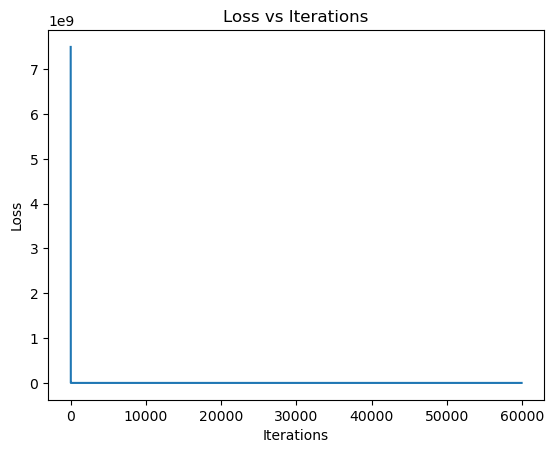

Last Loss:  37611.08863991795


In [5]:
loss = model[2]
plt.plot(loss)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs Iterations')
plt.show()
print("Last Loss: ", loss[-1])



In [6]:
G= model[0]
W = model[1]

In [7]:
signatures = train@W
diag = signatures.sum(axis=0)
exp = G@np.diag(diag).T
signatures = signatures@np.diag(1/diag)


In [8]:
out_error = reconstruction_error(test,signatures)
print(out_error)

14631.175909868007
